# ECG classification

Laurent Cetinsoy - Datadidacte


In [1]:
from IPython.display import HTML

## A first naive model by extracting simple features


Your environment contains variables arr, nsr, and chf which respectively contain 10-second recordings of ECG signals extracted from three datasets on PhysioNet: one from a person suffering from arrhythmia, one from a person with a normal heart rhythm, and another from a person with heart failure.


Matplotlib  subplots (or any other library), display these signals on three subfigures (the subplots should be called with the parameter nrows = 3).
Can you find any differences between them?

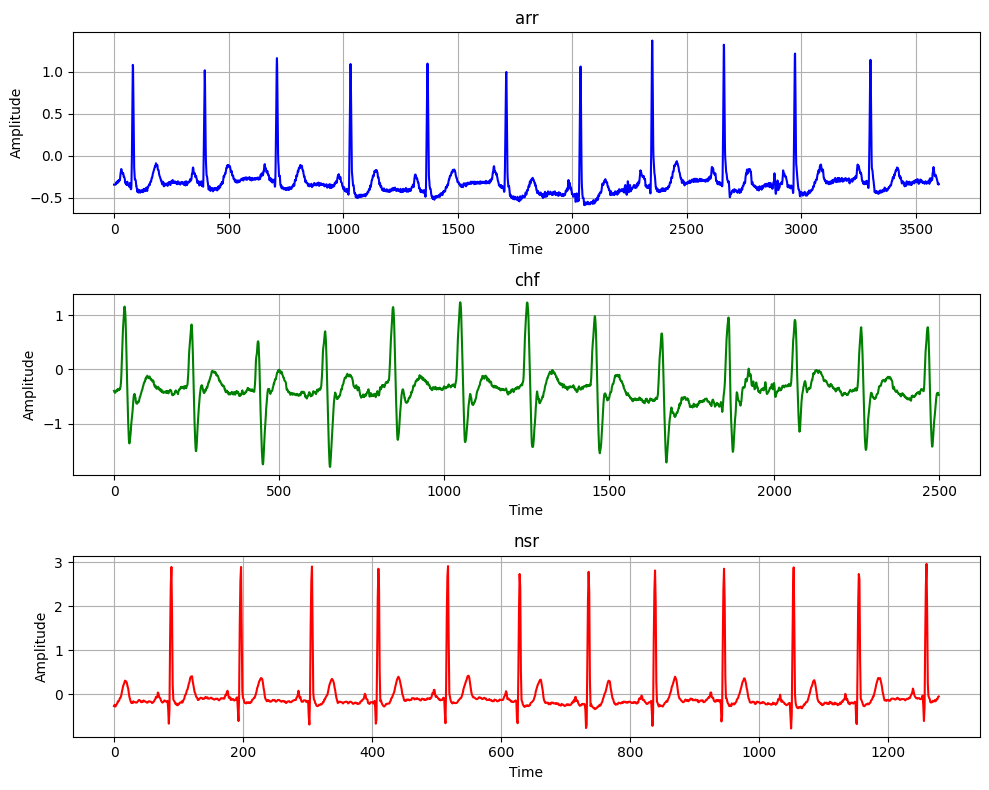

In [5]:
import numpy as np
import matplotlib.pyplot as plt

DATA_DIR = ''

arr = np.loadtxt(DATA_DIR + 'arr.txt')
chf = np.loadtxt(DATA_DIR + 'chf.txt')
nsr = np.loadtxt(DATA_DIR + 'nsr.txt')

#plot data
fig, axs = plt.subplots(nrows=3, figsize=(10, 8))
axs[0].plot(arr, color='blue')
axs[0].set_title('arr')
axs[0].grid(True)
axs[0].set_ylabel('Amplitude')
axs[0].set_xlabel('Time')

axs[1].plot(chf, color='green')
axs[1].set_title('chf')
axs[1].grid(True)
axs[1].set_ylabel('Amplitude')
axs[1].set_xlabel('Time')

axs[2].plot(nsr, color='red')
axs[2].set_title('nsr')
axs[2].grid(True)
axs[2].set_ylabel('Amplitude')
axs[2].set_xlabel('Time')

plt.tight_layout()
plt.show()


**Answer**  
We can find difference between them. Peek and oscillation are differents. peeks on nsr curves are two times higher than the other (that have failure)

We want to extract features from the time series. For that we will use simple statistics.


Create a function named calculate_stats_features(x) that calculates some statistical features of a signal x using standard numpy functions: nanpercentile, nanmean, etc.
calculate_stats_features will return a list of features in this order:

0. Max
1. Min
2. Mean
3. Median
4. Variance

In [6]:
def calculate_stats_features(x):
    min_val = np.min(x)
    max_val = np.max(x)
    mean = np.mean(x)
    median = np.median(x)
    variance = np.var(x)

    return min_val, max_val, mean, median, variance,



Create a function named `calculate_zero_crossing(x)` that calculates the Zero
Crossing of a signal x.

The zero crossing is defined as the number of times the signal changes sign.
For this, you can use the signbit, diff, and nonzero functions from numpy.


In [2]:
def calculate_zero_crossing(x):
    sign_changes = np.diff(np.signbit(x))
    return np.count_nonzero(sign_changes)

Create a function named **calculate_rms(x)** that returns the Root Mean Square (RMS) of a signal x. We will use the nanmean function instead of the mean function from numpy.

In [3]:
def calculate_rms(x):
    return np.sqrt(np.nanmean(np.square(x)))

Create a function named calculate_entropy(x) that calculates the Shannon entropy of a signal x using the entropy function from scipy.stats.

In [4]:
import scipy.stats as stats
def calculate_entropy(x):
    value_counts, _ = np.histogram(x, bins=10, density=True)
    return stats.entropy(value_counts)

Create a function get_features(x) that combines the features calculated by all previous functions including caculate_stats_features.

In [5]:
def get_features(x):
    min_val, max_val, mean, median, variance = calculate_stats_features(x)
    zero_crossing = calculate_zero_crossing(x)
    rms = calculate_rms(x)
    entropy = calculate_entropy(x)
    return min_val, max_val, mean, median, variance, zero_crossing, rms, entropy

Load the small ecg dataset
Use your fonction get_features create a new dataframe where you have all the feature as X and y as the label.
Train a random forest on it after doing a train test split if the dataset is not too small

In [7]:
import pandas as pd
df = pd.read_csv('ecg_small_dataset.csv')
df = df.drop(df.columns[0], axis=1)
labels = df.iloc[:, 0]
df = df.drop(df.columns[0], axis=1)
df.head()

,2,3,4,5,6,7,8,9,10,11,...,15352,15353,15354,15355,15356,15357,15358,15359,15360,15361
0,-0.429539,-0.431368,-0.427633,-0.453029,-0.460659,-0.448497,-0.469340,-0.475054,-0.473138,-0.454968,...,-0.299412,-0.341126,-0.364847,-0.360565,-0.358913,-0.406275,-0.452011,-0.440424,-0.417412,-0.419938
1,-0.527040,-0.542357,-0.539678,-0.541406,-0.518841,-0.505650,-0.523337,-0.532713,-0.520244,-0.512301,...,-0.523533,-0.542245,-0.544550,-0.523466,-0.510608,-0.497607,-0.508469,-0.495939,-0.479749,-0.484566
2,-0.410425,-0.416644,-0.424048,-0.398195,-0.393680,-0.386315,-0.371686,-0.377065,-0.368017,-0.358891,...,-0.288222,-0.742357,-1.088831,-1.347331,-1.349561,-1.165759,-1.004126,-0.829844,-0.671777,-0.536377
3,-0.007009,-0.069041,-0.063572,-0.080944,-0.070556,-0.098701,-0.090165,-0.108852,-0.074475,-0.132318,...,-1.906522,-1.694052,-1.534222,-1.338660,-1.167661,-0.989236,-0.777201,-0.544748,-0.313120,-0.032588
4,-0.325000,-0.395000,-0.255000,-0.335000,-0.375000,-0.335000,-0.285000,-0.275000,-0.245000,-0.215000,...,-0.085000,-0.105000,-0.135000,-0.135000,-0.155000,-0.155000,-0.135000,-0.145000,-0.125000,-0.115000


In [ ]:
features_list = []
for _, row in df.iterrows():
    features = get_features(row)
    features_list.append(features)
features_df = pd.DataFrame(features_list, columns=['min_val', 'max_val', 'mean', 'median', 'variance', 'zero_crossing', 'rms', 'entropy'])
features_df['Label'] = labels
features_df.head()

,min_val,max_val,mean,median,variance,zero_crossing,rms,entropy,Label
0,-0.592731,1.002118,-0.340759,-0.376057,0.032634,358,0.385683,0.826990,1
1,-0.923734,-0.281521,-0.510468,-0.505293,0.003658,0,0.514039,1.284598,1
2,-2.492697,1.235749,-0.344063,-0.354895,0.146738,418,0.514895,1.277449,2
3,-3.105455,1.295494,-0.195126,-0.133382,0.721041,384,0.871272,1.761050,2
4,-1.005000,2.445000,-0.046349,-0.105000,0.133627,1150,0.368477,1.051732,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X = features_df.drop('Label', axis=1)
y = features_df['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')

Accuracy: 0.3333333333333333


Now you have a first pipeline, do the same on the full dataset
Report the train and test loss

In [ ]:
df2 = pd.read_csv(DATA_DIR + 'ECG_classification_full_dataset/ECG-laurent.csv')
df2 = df2.drop(df2.columns[0], axis=1)
labels_2 = df2.iloc[:, 0]
df2 = df2.drop(df2.columns[0], axis=1)

features_list_2 = []
for _ , row in df2.iterrows():
    features = get_features(row)
    features_list_2.append(features)
features_df2 = pd.DataFrame(features_list_2, columns=['min_val', 'max_val', 'mean', 'median', 'variance', 'zero_crossing', 'rms', 'entropy'])
features_df2['Label'] = labels_2
features_df2.head()

C:\Users\bellb\AppData\Local\Temp\ipykernel_16284\438993627.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv(DATA_DIR + 'ECG_classification_full_dataset/ECG-laurent.csv')


,min_val,max_val,mean,median,variance,zero_crossing,rms,entropy,Label
0,-2.460911,3.006143,-0.268554,-0.346791,0.420271,4154,0.701707,1.478265,1
1,-3.550697,2.527708,-0.221014,-0.106818,0.536639,3768,0.765171,1.275753,1
2,-3.929179,2.264555,-0.163022,-0.153941,0.182135,2253,0.456849,1.090576,1
3,-1.906982,3.055421,0.053962,0.051409,0.158568,3102,0.401846,1.227413,1
4,-1.575197,2.035001,-0.148872,-0.174830,0.111417,4748,0.365486,1.306958,1


In [ ]:
X = features_df2.drop('Label', axis=1)
y = features_df2['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.88


try to tweak the model hyperparameter to see if it works

In [ ]:
clf = RandomForestClassifier(n_estimators=10, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.82


## Fourier transform features

We want now to see if a model using only fourier transform could work.

create a function get_fourier_coefficients(ecg)

In [ ]:
def get_fourier_coefficients(ecg):
	fourier_transform = np.fft.fft(ecg)
	magnitude = np.abs(fourier_transform)
	return magnitude

Using this function create a dataframe df_fourrier containing the fourrier transform coefficients and the label

In [ ]:
def create_fourier_dataframe(ecg_data, labels):
    fourier_features = []
    for ecg in ecg_data:
        coefficients = get_fourier_coefficients(ecg)
        fourier_features.append(coefficients)

    df_fourrier = pd.DataFrame(fourier_features)
    df_fourrier['Label'] = labels

    return df_fourrier

Try to train a model using the Fourrier coefficient

In [ ]:
df_fourrier = create_fourier_dataframe(df2.values, labels_2)

X_fourrier = df_fourrier.drop(columns=['Label'])
y_fourrier = df_fourrier['Label']

X_train_fourrier, X_test_fourrier, y_train_fourrier, y_test_fourrier = train_test_split(X_fourrier, y_fourrier, test_size=0.2, random_state=42)

clf_fourrier = RandomForestClassifier(n_estimators=100, random_state=42)
clf_fourrier.fit(X_train_fourrier, y_train_fourrier)

y_pred_fourrier = clf_fourrier.predict(X_test_fourrier)
accuracy_fourrier = accuracy_score(y_test_fourrier, y_pred_fourrier)
print(f"Accuracy: {accuracy_fourrier:.2f}")

Accuracy: 0.79


Try to learn a model using both fourrier coefficient and the features from the previous sections. Does it work ?

In [ ]:
df_1 = features_df2.drop(columns=['Label'])
df_f = df_fourrier.drop(columns=['Label'])

X = pd.concat([df_1, df_f], axis=1)
X.columns = X.columns.astype(str)

display(X.head())

y = features_df2['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy : {accuracy:.2f}")

,min_val,max_val,mean,median,variance,zero_crossing,rms,entropy,0,1,...,65526,65527,65528,65529,65530,65531,65532,65533,65534,65535
0,-2.460911,3.006143,-0.268554,-0.346791,0.420271,4154,0.701707,1.478265,17599.976889,1850.171567,...,1161.365509,545.466498,1559.152560,689.752202,828.133738,538.293366,926.385162,1185.545859,295.333800,1850.171567
1,-3.550697,2.527708,-0.221014,-0.106818,0.536639,3768,0.765171,1.275753,14484.396444,4137.499334,...,537.355100,1195.160663,1648.125085,945.659290,1579.574817,1640.749953,2066.642615,2520.424900,2152.391165,4137.499334
2,-3.929179,2.264555,-0.163022,-0.153941,0.182135,2253,0.456849,1.090576,10683.818667,400.463461,...,745.443443,910.135298,82.521093,1231.230068,618.667927,946.182174,964.923609,729.461562,481.532272,400.463461
3,-1.906982,3.055421,0.053962,0.051409,0.158568,3102,0.401846,1.227413,3536.462222,313.204866,...,1011.333733,501.455323,2237.361623,409.162029,620.723292,600.576281,647.502832,667.082007,531.520312,313.204866
4,-1.575197,2.035001,-0.148872,-0.174830,0.111417,4748,0.365486,1.306958,9756.496000,303.329945,...,590.579985,194.837216,865.347508,111.595226,1134.805832,272.183845,380.981983,609.179346,596.020424,303.329945


Accuracy : 0.79


Yes, it's works but it doesn't make any difference to add other features, the result is the same.

## Wavelets

We now wants to use another signal decomposition which are called wavelet. Wavelet are a multi-scale function decomposition on a familly of functions generated from what is called a mother wavelet.

Using PyWavelet make a function get_wavelet_coefficients(ecg) that returns the wavelet coefficient of a given ECG


In [ ]:
import pywt

def get_wavelet_coefficients(ecg):
    coeffs = pywt.wavedec(ecg, 'db1')
    arr, coeff_slices = pywt.coeffs_to_array(coeffs)
    return arr, coeff_slices

Using the get_wavelet_coefficients, create a dataframe when the features are the coefficients and include the label

In [ ]:
wavelet_features = []
labels = []

for ecg in df2.values:
    arr, coeff_slices = get_wavelet_coefficients(ecg)
    wavelet_features.append(arr)

df_wavelet = pd.DataFrame(wavelet_features)
df_wavelet['Label'] = labels_2

display(df_wavelet.head())

,0,1,2,3,4,5,6,7,8,9,...,65527,65528,65529,65530,65531,65532,65533,65534,65535,Label
0,-68.749910,-11.826685,-2.399030,1.236612,-4.656965,-2.297531,2.591033,-2.478539,-5.257261,-4.816248,...,0.016719,0.053518,0.021233,0.014724,-0.040096,-0.045579,-0.042910,0.038852,0.117287,1
1,-56.579674,-27.244620,-14.731033,-5.047685,-14.456471,-0.901384,-3.216877,-3.811263,-8.080177,-1.256813,...,-0.015836,-0.018014,-0.048044,-0.036967,-0.004891,0.054351,0.036088,-0.000337,-0.029607,1
2,-41.733667,0.722720,2.982323,0.895042,2.758237,3.510943,3.709214,-0.779515,0.150140,-1.869702,...,0.025392,0.068484,0.084473,0.207043,-0.089120,-0.153329,-0.082890,-0.055987,-0.014258,1
3,13.814306,1.704916,-3.692958,-1.195417,-0.892720,-0.224864,-1.461370,2.788254,-6.178901,-0.277783,...,0.011268,0.044394,0.175267,-0.045659,-0.127169,-0.135989,0.065010,0.080593,0.014107,1
4,-38.111313,0.902173,1.229560,0.112356,-1.572446,-2.597243,2.557756,-2.462871,0.371768,0.754228,...,0.004778,-0.050799,-0.437964,0.558049,-0.084620,0.043570,-0.033640,-0.107628,-0.159106,1


Train a random forest classifier with such features. DOes the model work ?

In [ ]:
X_wavelet = df_wavelet.drop(columns=['Label'])
y_wavelet = df_wavelet['Label']

X_train_wavelet, X_test_wavelet, y_train_wavelet, y_test_wavelet = train_test_split(
    X_wavelet, y_wavelet, test_size=0.2, random_state=42
)

clf_wavelet = RandomForestClassifier(n_estimators=100, random_state=42)
clf_wavelet.fit(X_train_wavelet, y_train_wavelet)

y_pred_wavelet = clf_wavelet.predict(X_test_wavelet)

accuracy_wavelet = accuracy_score(y_test_wavelet, y_pred_wavelet)
print(f"Accuracy: {accuracy_wavelet:.2f}")

Accuracy: 0.61


The model did not improve, the Random Forest on wavelet features is not performing as expected.

Add one or several of the previous feature functions and try to train another model

In [ ]:
#test with all features
X_test = pd.concat([X, X_test_wavelet], axis=1)
X_test.columns = X_test.columns.astype(str)

X_test = X_test.dropna(axis=1)

X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(
    X_test, y_wavelet, test_size=0.2, random_state=42
)

clf_all = RandomForestClassifier(n_estimators=100, random_state=42)
clf_all.fit(X_train_all, y_train_all)

y_pred_all = clf_all.predict(X_test_all)

accuracy_all = accuracy_score(y_test_all, y_pred_all)
print(f"Accuracy: {accuracy_all:.2f}")


Accuracy: 0.79


In [ ]:
#test with GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier

clf_gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
clf_gb.fit(X_train_all, y_train_all)

y_pred_all2 = clf_gb.predict(X_test_all)
accuracy_gb = accuracy_score(y_test_all, y_pred_all)
print(f"Accuracy: {accuracy_gb:.2f}")

Accuracy: 0.79


Specify the methodology you used to train the model and report the various attempts results into a table

***Methodology*** :  
 
**1. Data Preparation** : Column names are cast to strings and missing data are dropped  
**2. Train-test-split** : X_test (features) and y_wavelet are split to train and test (20% for test)  
**3. model and training** : A RandomForestClassifier is used and train with fit on training datas.  
**4. Evaluate** : Model is evaluate with predict and the accuracy score is calculated.  

In [ ]:
from sklearn.metrics import mean_squared_error

mse_wavelet = mean_squared_error(y_test_wavelet, y_pred_wavelet)
mse_all = mean_squared_error(y_test_all, y_pred_all)
mse_gb = mean_squared_error(y_test_all, y_pred_all2)

results = [
    {"Model": "Random Forest (Wavelet Features)", "Accuracy": accuracy_wavelet, "MSE" : mse_wavelet},
    {"Model": "Random Forest (All Features)", "Accuracy": accuracy_all, "MSE" : mse_all},
    {"Model": "Gradient Boosting (All Features)", "Accuracy": accuracy_gb, "MSE" : mse_gb}
]

res_df = pd.DataFrame(results)
display(res_df)

,Model,Accuracy,MSE
0,Random Forest (Wavelet Features),0.606061,0.393939
1,Random Forest (All Features),0.787879,0.212121
2,Gradient Boosting (All Features),0.787879,0.060606


We can see that using a different model with all the features improves the result (smaller loss)

## Deep learning (1D CNN)

Now we want to see if we can skip all theses feature engineering techniques !
Design and train a multi-layer one dimensional CNN using the raw ECG signal as features.


Could you reach or surpass the feature based models ?

In [14]:
import pandas as pd

df_cnn = pd.read_csv('ECG-laurent.csv')
df_cnn = df_cnn.drop(df_cnn.columns[0], axis=1)
labels = df_cnn.iloc[:, 0]

X = df_cnn.drop(df_cnn.columns[0], axis=1)

<ipython-input-14-500b745244ab>:3: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_cnn = pd.read_csv('ECG-laurent.csv')


In [15]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

X_train, X_test, y_train, y_test = train_test_split(X, encoded_labels, test_size=0.4, random_state=42)

X_train = X_train.values.reshape((-1, X_train.shape[1], 1))
X_test = X_test.values.reshape((-1, X_test.shape[1], 1))

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

cnn_model = Sequential([
    Conv1D(32, kernel_size=5, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Conv1D(64, kernel_size=5, activation='relu'),
    MaxPooling1D(pool_size=2),
    Conv1D(128, kernel_size=5, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(len(np.unique(encoded_labels)), activation='softmax')
])

cnn_model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
training_history = cnn_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))
loss, accuracy = cnn_model.evaluate(X_test, y_test)

print(f"Test_loss : : {loss}")
print(f"Test accuracy : {accuracy}")


Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.3493 - loss: 21.2499 - val_accuracy: 0.3692 - val_loss: 3.6960
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 262ms/step - accuracy: 0.4451 - loss: 2.4344 - val_accuracy: 0.4769 - val_loss: 1.0967
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 260ms/step - accuracy: 0.6701 - loss: 0.6322 - val_accuracy: 0.7385 - val_loss: 0.8261
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 292ms/step - accuracy: 0.8288 - loss: 0.5778 - val_accuracy: 0.6308 - val_loss: 0.7952
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 295ms/step - accuracy: 0.7853 - loss: 0.4980 - val_accuracy: 0.6615 - val_loss: 0.8066
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 268ms/step - accuracy: 0.8350 - loss: 0.3593 - val_accuracy: 0.7692 - val_loss: 0.5564
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 261ms/step - accuracy: 0.9409 - loss: 0.2139 - val_accuracy: 0.6923 - val_loss: 0.8021
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 259ms/step - accuracy: 0.8848 - loss: 0.1844 - val_accuracy: 0.6923 - val_loss: 

Yes, the CNN model (which is very simple here) achieves nearly similar results. With a  more complex model, it could surpass the performance of the feature based models.